<a href="https://colab.research.google.com/github/andoniVT/CNSummarizer/blob/master/result_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Consideracoes iniciais**

O  primeiro dataframe  contem as principais informações de todos os artigos que foram baixados do Web of Science para o artigo “Using network science and text analytics to produce surveys in a scientific topic”. Eu usei a rede de citacao gerada e testei diferentes metodos de  deteccao de comunidades. Eu usei o metodo word index (que da valor de importancia a cada palavra de acordo a frequencia fora e dentro de uma comunidade).  O metodo permitiu ordenar todas  as palavras do abstract de acordo ao seu word index. 


Para o seguinte dataframe: Eu pesquisei no arXiv o conteudo completo dos papers do dataframe anterior. Eu encontrei 1982 artigos com o conteudo completo. Eu fiz o pre-processamento do conteudo completo, e depois usei varios metodos de extracao de keywords para encontrar os keywords de cada paper. Usei o metodo de votacao para encontrar os keywords de referencia de cada artigo. Usei os seguintes metodos de extracao de keywords: i) entropia, ii) intermitency, iii) tf-idf , iv) text rank, v)  yake, vi) baseado em BERT, vii) baseado na frequncia da palavra. 


In [3]:
import pandas as pd
import numpy as np

path_all = 'drive/My Drive/ShortKeywordExtraction/dataset/all_papers_data.csv' 
df_all = pd.read_csv(path_all)
df_all.info()
print()

path = 'drive/My Drive/ShortKeywordExtraction/dataset/all_data_complete_content.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10942 entries, 0 to 10941
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wos_id                10942 non-null  object 
 1   title                 10942 non-null  object 
 2   abstract              10942 non-null  object 
 3   year                  10942 non-null  float64
 4   comm_multilevel       10942 non-null  int64  
 5   comm_labelProp        10942 non-null  int64  
 6   comm_leiden           10942 non-null  int64  
 7   comm_fastG            10942 non-null  int64  
 8   comm_infomap          10942 non-null  int64  
 9   pAbstract             10942 non-null  object 
 10  pAbstract_multilevel  10942 non-null  object 
 11  pAbstract_labelProp   10942 non-null  object 
 12  pAbstract_leiden      10942 non-null  object 
 13  pAbstract_fastG       10942 non-null  object 
 14  pAbstract_infomap     10942 non-null  object 
dtypes: float64(1), int6

**Accuracy analysis**

Comparei os keywords de referencia (extraidos da combinacao ou votacao dos metodos de keyword extraction para o texto completo)  com cada metodo proposto para extrair keywords de cada abstract. N é o numero de palavras que estao sendo considerados. Fiz testes tambem coniderando como keywords de reeferencia usando o metodo baseado em BERT e o metodo baseado em TF-IDF


In [4]:
#def accuracy(text, refKeys, N_abs=30, N_keys=30):
def accuracy(text, refKeys, N):
  text = text.split()[0:N]
  refKeys = refKeys.split()[0:N]
  acc = len(set(text) & set(refKeys))/N
  return acc

def mean_accuracy(textos, all_keywords, N):
  values = []
  for text, keywords in zip(textos, all_keywords):
    acc = accuracy(text, keywords, N)
    values.append(acc)
  return round(np.mean(values), 4) 

referenceKeywords = list(df['refKeywords'])
referenceKeywords100 = list(df['refKeywords100'])
referenceKeywordsBert = list(df['refKeywordsBert'])
referenceKeywordsTfidf = list(df['refKeywordsTfidf'])

sizes_test = [10, 20, 30, 40, 50]
columns = ['pAbstract_multilevel', 'pAbstract_labelProp', 'pAbstract_leiden', 
           'pAbstract_fastG', 'pAbstract_infomap', 'tfidfAbsKeys', 'kmeansAbsKeys']
names = ['multilevel', 'labelProp', 'leiden', 'fastG', 'infomap', 'tfidf', 'kmeans'] 


result = {'method':names}
result2 = {'method':names}
result3 = {'method':names}

for size in sizes_test:
  values = []
  values2 = []
  values3 = []
  for method in columns:  
    abstracts = list(df[method])
    acc = mean_accuracy(abstracts, referenceKeywords, size)
    acc2 = mean_accuracy(abstracts, referenceKeywordsBert, size)
    acc3 = mean_accuracy(abstracts, referenceKeywordsTfidf, size)
    values.append(acc)
    values2.append(acc2)
    values3.append(acc3)
  result['N='+str(size)] = values
  result2['N='+str(size)] = values2
  result3['N='+str(size)] = values3

print('Results based on keyword votation')
df_res = pd.DataFrame.from_dict(result)
print(df_res)
print()

print('Results based on keyword BERT')
df_res2 = pd.DataFrame.from_dict(result2)
print(df_res2)
print()

print('Results based on keyword TfIdf')
df_res3 = pd.DataFrame.from_dict(result3)
print(df_res3)


Results based on keyword votation
       method    N=10    N=20    N=30    N=40    N=50
0  multilevel  0.1231  0.1925  0.2688  0.3283  0.3605
1   labelProp  0.1108  0.1758  0.2485  0.3123  0.3503
2      leiden  0.1325  0.2003  0.2716  0.3274  0.3611
3       fastG  0.1300  0.1941  0.2702  0.3280  0.3604
4     infomap  0.1115  0.1826  0.2633  0.3251  0.3594
5       tfidf  0.1891  0.2280  0.2687  0.3070  0.3388
6      kmeans  0.2761  0.3110  0.3531  0.3746  0.3826

Results based on keyword BERT
       method    N=10    N=20    N=30    N=40    N=50
0  multilevel  0.0573  0.0924  0.1254  0.1501  0.1633
1   labelProp  0.0710  0.0936  0.1221  0.1462  0.1602
2      leiden  0.0757  0.1092  0.1325  0.1518  0.1635
3       fastG  0.0739  0.0965  0.1257  0.1494  0.1624
4     infomap  0.0596  0.0938  0.1261  0.1483  0.1606
5       tfidf  0.0899  0.1043  0.1207  0.1394  0.1538
6      kmeans  0.1804  0.1668  0.1688  0.1726  0.1731

Results based on keyword TfIdf
       method    N=10    N=20    N=30  

Tambem modelei cada abstract como redes de co-ocorrencia de palavras. Depois usei medidas de centralidade em redes para fazer o rankings das palavras dos abstracts. Usei as medidas de degree, pageRank, betweeness, eigenvector e closeness. 


In [ ]:
path = 'drive/My Drive/ShortKeywordExtraction/dataset/all_papers_network_metrics.csv'
df_metrics = pd.read_csv(path)
papers_id = list(df['wos_id'])
df_metrics = df_metrics[df_metrics['wod_id'].isin(papers_id)]
df_metrics.info()
print()

sizes_test = [10, 20, 30, 40, 50]
columns = ['pAbs_Dgr', 'pAbs_Pr', 'pAbs_Btw', 'pAbs_Eig', 'pAbs_Clos']
names = ['degree', 'pageRank', 'betweenness', 'eigenVector', 'closeness'] 

result = {'metric':names}
for size in sizes_test:
  values = []
  for method in columns:  
    abstracts = list(df_metrics[method])
    acc = mean_accuracy(abstracts, referenceKeywords, size)
    values.append(acc)
  result['N='+str(size)] = values

df_res2 = pd.DataFrame.from_dict(result)
print(df_res2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 1 to 10941
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   wod_id     1982 non-null   object
 1   pAbstract  1982 non-null   object
 2   pAbs_Dgr   1982 non-null   object
 3   pAbs_Pr    1982 non-null   object
 4   pAbs_Btw   1982 non-null   object
 5   pAbs_Eig   1982 non-null   object
 6   pAbs_Clos  1982 non-null   object
dtypes: object(7)
memory usage: 123.9+ KB

        metric    N=10    N=20    N=30    N=40    N=50
0       degree  0.1777  0.1733  0.1816  0.1864  0.1888
1     pageRank  0.1772  0.1693  0.1784  0.1859  0.1886
2  betweenness  0.1599  0.1627  0.1765  0.1860  0.1887
3  eigenVector  0.1450  0.1502  0.1694  0.1833  0.1887
4    closeness  0.1502  0.1560  0.1731  0.1846  0.1892


**Common words (Abstracts - Complete Content)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wos_id                1982 non-null   object 
 1   title                 1982 non-null   object 
 2   abstract              1982 non-null   object 
 3   year                  1982 non-null   float64
 4   pAbstract             1982 non-null   object 
 5   pAbstract_multilevel  1982 non-null   object 
 6   pAbstract_labelProp   1982 non-null   object 
 7   pAbstract_leiden      1982 non-null   object 
 8   pAbstract_fastG       1982 non-null   object 
 9   pAbstract_infomap     1982 non-null   object 
 10  content               1982 non-null   object 
 11  refKeywords           1982 non-null   object 
 12  refKeywords100        1982 non-null   object 
 13  tfidfAbsKeys          1982 non-null   object 
 14  kmeansAbsKeys         1982 non-null   object 
dtypes: float64(1), object

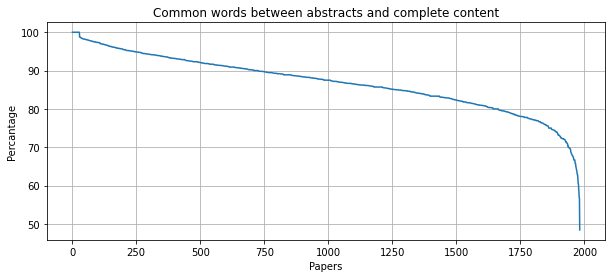

In [ ]:
import matplotlib.pyplot as plt
df.info()
abstracts = list(df['pAbstract'])#[0:20]
content = list(df['content'])#[0:20]



percentages = []
for abst, cont in zip(abstracts, content):
  abst = set(abst.split())
  cont = set(cont.split())
  inter = len(abst & cont) 
  per = round((inter*100)/len(abst), 2) 
  percentages.append(per)

percentages = sorted(percentages, reverse=True)
x = [i+1 for i in range(len(percentages))]
plt.figure(figsize=(10,4))
plt.grid()
plt.xlabel('Papers')
plt.ylabel('Percantage')
plt.title('Common words between abstracts and complete content')
plt.plot(x, percentages)
#plt.scatter(x, percentages)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3.028254288597376, 3.5923309788092834, 4.136226034308779, 4.6387487386478305, 5.1140262361251265, 5.55146316851665, 5.935418768920282, 6.3183652875882945, 6.677598385469223, 7.045913218970736, 7.429364278506559, 7.836024217961655, 8.26084762865792, 8.703834510595359, 9.163471241170535, 9.640766902119072, 10.093844601412714, 10.541372351160444, 10.960141271442987, 11.350655903128153, 11.751261352169525, 12.140766902119072, 12.541372351160444, 12.92936427850656, 13.342583249243189, 13.747729566094854, 14.151362260343088, 14.562058526740666, 14.940464177598386, 15.321897073662967, 15.684661957618568, 16.028254288597378, 16.356710393541878, 16.67608476286579, 16.99848637739657, 17.337033299697275, 17.70433905146317, 18.078708375378405, 18.472754793138243, 18.869323915237135, 19.247729566094854, 19.594853683148337, 19.904137235116046, 20.183652875882945

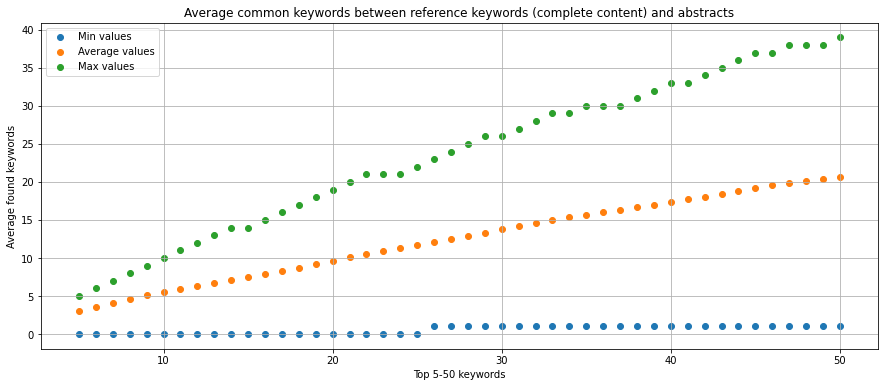

In [ ]:

sizes = [x+5 for x in range(46)]
container = [[] for _ in range(len(sizes))]

for abstract, keywords in zip(abstracts, referenceKeywords):
  abstract = set(abstract.split()) 
  keywords = keywords.split()
  for index, group in enumerate(sizes):
    inter = len(set(keywords[0:group])& abstract)
    container[index].append(inter)
    #print(group, '->', inter)
  #print()


plt.figure(figsize=(15,6)) #15,6
mines = []
medias = []
maxes = []

for  i in container:
  mines.append(min(i))
  medias.append(np.mean(i))
  maxes.append(max(i))


print(mines)
print(medias)
print(maxes)
plt.grid()
plt.title('Average common keywords between reference keywords (complete content) and abstracts')
plt.xlabel('Top 5-50 keywords')
plt.ylabel('Average found keywords')
plt.scatter(sizes, mines, label='Min values')
plt.scatter(sizes, medias, label='Average values')
plt.scatter(sizes, maxes, label='Max values')
plt.legend()


1982
[0.6801210898082745, 0.7921291624621595, 0.9081735620585267, 1.024217961654894, 1.131180625630676, 1.2305751765893038, 1.3047426841574168, 1.380928355196771, 1.4556004036326942, 1.543390514631685, 1.6200807265388497, 1.6962663975782037, 1.789606458123108, 1.884460141271443, 1.9808274470232088, 2.0852674066599395, 2.18920282542886, 2.2891019172552975, 2.368314833501514, 2.452068617558022, 2.5443995963673056, 2.6251261352169526, 2.7043390514631684, 2.789606458123108, 2.872351160443996, 2.9566094853683147, 3.0383451059535824, 3.143289606458123, 3.22401614530777, 3.3062563067608477, 3.393037336024218, 3.4752774974772955, 3.5509586276488396, 3.6135216952573157, 3.674066599394551, 3.7522704339051463, 3.8350151362260343, 3.918768920282543, 4.005549949545913, 4.089808274470232, 4.162462159434914, 4.220484359233098, 4.291120080726539, 4.359233097880928, 4.407669021190716, 4.452068617558022]

1982
[0.6796165489404642, 0.777497477295661, 0.8652875882946519, 0.955095862764884, 1.0358224016145

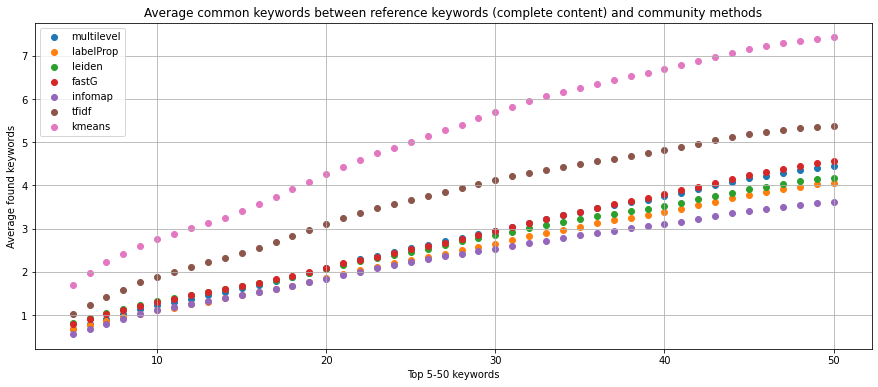

In [ ]:
#test = df.head(50)

col_names = ['pAbstract_multilevel', 'pAbstract_labelProp', 'pAbstract_leiden', 
             'pAbstract_fastG', 'pAbstract_infomap', 'tfidfAbsKeys', 'kmeansAbsKeys']
label_names = ['multilevel', 'labelProp', 'leiden', 'fastG', 'infomap', 'tfidf', 'kmeans']
comm_keywords = [list(df[name]) for name in col_names]
sizes = [x+5 for x in range(46)]
#sizes = [5, 10, 15, 20, 25, 30]
# community abstracts --> 0:10 ?? 
# long content --> 0:30 ??

size_abst_com = 10

res_values = []
for method in comm_keywords:
  print(len(method))
  container = [[] for _ in range(len(sizes))]
  for abstract, keywords in zip(method, referenceKeywords):
    abstract = abstract.split()[0:size_abst_com] #????????
    keywords = keywords.split()
    for index, group in enumerate(sizes):
      inter = len(set(keywords[0:group])& set(abstract))
      container[index].append(inter)
  #print(len(container),container)
  means = [np.mean(i) for i in container]
  res_values.append(means)
  print(means)
  print()

plt.figure(figsize=(15,6))
plt.grid()
plt.title('Average common keywords between reference keywords (complete content) and community methods')
plt.xlabel('Top 5-50 keywords')
plt.ylabel('Average found keywords')
for values, name in zip(res_values, label_names):
  plt.scatter(sizes, values, label=name)
plt.legend()



**Correlation Analysis**


A ideia deste experimento foi ver se os rankings que são obtidos pelos métodos das comunidades (para textos pequenos) tem alguma correlação com os rankings que são obtidos pelos métodos para textos completos. A metodologia proposta foi a seguinte: depois de detectar o ranking de palavras chave do texto completo, eu fiz um match com as palavras do abstract para obter um rank das palavras que estão no abstract. Da mesma forma, eu gerei o ranking quando usamos o método das comunidades para calcular palavras chave. Então, eu comparo os dois rankings obtidos usando o método de correlação de Spearman. Resumindo, precisamos de dois rankings:
*   Ranqueamento das palavras do resumo baseado no método das comunidades
*   Ranqueamento das palavras do resumo baseado nos métodos de extração de keywords para os textos completos. 



In [ ]:
from scipy import stats
def get_dict_from_text(content):
  content = content.split()
  result = dict()
  value = 100
  for word in content:
    result[word] = value
    value-=1
  return result 

def sort_words_long(content, dict_values):
  content = content.split()
  content = content[0:30]
  sizes = [5, 10, 15, 20, 25, 30]
  result = []
  for top in sizes:
    auxi = dict()
    for word in content[0:top]:
      if word in dict_values:
        auxi[word] = dict_values[word]
      else:
        auxi[word] = 0
    auxi = dict(sorted(auxi.items(), key=lambda item: item[1],reverse=True))
    long_keys = list(auxi.keys())
    result.append(long_keys)
  return result


def get_correlations(reference,values):
  reference = reference.split()
  sizes = [5, 10, 15, 20, 25, 30]
  correlations = []
  for size, val in zip(sizes,values):
    text = reference[0:size]
    dict_text = {word:index+1 for index, word in enumerate(text)}
    ranking_ref = [index+1 for index in range(len(text))]
    ranking_long = [dict_text[x] for x in val]
    corr = stats.spearmanr(ranking_ref, ranking_long)[0]
    correlations.append(corr)
  return correlations
  
def get_column_correlations(l1, l2):
  all_correlations = []
  for abst, vals in zip(l1,l2):
    val = get_correlations(abst,vals)
    all_correlations.append(val)
  all_correlations = np.array(all_correlations)
  avg_corrs = np.mean(all_correlations, axis=0)
  avg_corrs = [round(i,4) for i in avg_corrs]
  return avg_corrs


df['keyDict'] = df['refKeywords100'].apply(get_dict_from_text)

df.info()


df['longMultilevel'] = df.apply(lambda x: sort_words_long(x['pAbstract_multilevel'], x['keyDict']), axis=1)
df['longLabelProp'] = df.apply(lambda x: sort_words_long(x['pAbstract_labelProp'], x['keyDict']), axis=1)
df['longLeiden'] = df.apply(lambda x: sort_words_long(x['pAbstract_leiden'], x['keyDict']), axis=1)
df['longFastG'] = df.apply(lambda x: sort_words_long(x['pAbstract_fastG'], x['keyDict']), axis=1)
df['longInfomap'] = df.apply(lambda x: sort_words_long(x['pAbstract_infomap'], x['keyDict']), axis=1)

print('Calculating correlations')
m1 = get_column_correlations(df['pAbstract_multilevel'], df['longMultilevel'])
m2 = get_column_correlations(df['pAbstract_labelProp'], df['longLabelProp'])
m3 = get_column_correlations(df['pAbstract_leiden'], df['longLeiden'])
m4 = get_column_correlations(df['pAbstract_fastG'], df['longFastG'])
m5 = get_column_correlations(df['pAbstract_infomap'], df['longInfomap'])

all_results = [m1, m2, m3, m4, m5]

names = ['multilevel', 'labelProp', 'leiden', 'fastG', 'infomap']
sizes = [5, 10, 15, 20, 25, 30]

res_dict = {'method':names}

all_results = np.array(all_results)
for i in range(6):
  res_dict[str(sizes[i]) + ' topK'] = all_results[:,i]

print()
df_res = pd.DataFrame.from_dict(res_dict)
print(df_res)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wos_id                1982 non-null   object 
 1   title                 1982 non-null   object 
 2   abstract              1982 non-null   object 
 3   year                  1982 non-null   float64
 4   pAbstract             1982 non-null   object 
 5   pAbstract_multilevel  1982 non-null   object 
 6   pAbstract_labelProp   1982 non-null   object 
 7   pAbstract_leiden      1982 non-null   object 
 8   pAbstract_fastG       1982 non-null   object 
 9   pAbstract_infomap     1982 non-null   object 
 10  content               1982 non-null   object 
 11  refKeywords           1982 non-null   object 
 12  refKeywords100        1982 non-null   object 
 13  keyDict               1982 non-null   object 
 14  longMultilevel        1982 non-null   object 
 15  longLabelProp        

Para os testes a seguir, eu comparo a correlacao de Spearman entre cada metodo de detecao de comunidades. Para fazer isso, primeiro eu calculei o ranking obtido por cada metodo (de comunidades) para cada abstract. Eu considerei todas as palavras dos abstracts para a geracao dos rankings. Finalmente comparei cada metodo usando a correlacao de Spearman dos rankings.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wos_id                1982 non-null   object 
 1   title                 1982 non-null   object 
 2   abstract              1982 non-null   object 
 3   year                  1982 non-null   float64
 4   pAbstract             1982 non-null   object 
 5   pAbstract_multilevel  1982 non-null   object 
 6   pAbstract_labelProp   1982 non-null   object 
 7   pAbstract_leiden      1982 non-null   object 
 8   pAbstract_fastG       1982 non-null   object 
 9   pAbstract_infomap     1982 non-null   object 
 10  content               1982 non-null   object 
 11  refKeywords           1982 non-null   object 
 12  refKeywords100        1982 non-null   object 
 13  word_ids              1982 non-null   object 
dtypes: float64(1), object(13)
memory usage: 216.9+ KB
(5, 1982)
            

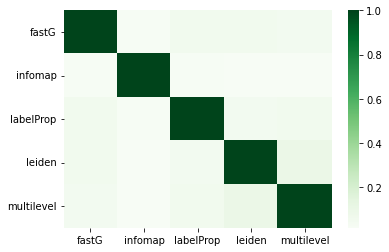

In [ ]:
import seaborn as sns

def get_words_ids(abstract):
  content = abstract.split()
  result = {word:id+1 for id,word in enumerate(content)} 
  return result

def get_rankings(df, column):
  rankings = []
  for index, row in df.iterrows():
    content = row[column]
    content = content.split()
    dict_ids = row['word_ids']
    ranking = [dict_ids[word] for word in content] 
    rankings.append(ranking)
  return rankings

def get_correlations(values):
  names = ['fastG', 'infomap', 'labelProp', 'leiden', 'multilevel']
  result = {names[0]:values[0], names[1]:values[1], names[2]:values[2], names[3]:values[3], names[4]:values[4]}
  result = pd.DataFrame.from_dict(result)
  cormat = result.corr(method='spearman')
  return cormat


df['word_ids'] = df['pAbstract'].apply(get_words_ids)
df.info()

names = ['pAbstract_fastG', 'pAbstract_infomap', 'pAbstract_labelProp', 'pAbstract_leiden', 'pAbstract_multilevel']
rankings = []

rank_1 = get_rankings(df, names[0])
rank_2 = get_rankings(df, names[1])
rank_3 = get_rankings(df, names[2])
rank_4 = get_rankings(df, names[3])
rank_5 = get_rankings(df, names[4])

rankings = np.array([rank_1, rank_2, rank_3, rank_4, rank_5], dtype=object)
print(rankings.shape)

dfs = []
for index in range(rankings.shape[1]):
  abstracts = rankings[:,index] 
  correlations = get_correlations(abstracts)
  dfs.append(correlations) 

df_res = pd.concat(dfs)
df_means = df_res.groupby(level=0).mean()
print(df_means)
sns.heatmap(df_means, cmap='Greens');


Para os testes a seguir, eu comparo a correlacao de Spearman entre cada medida de centralidade de redes obtida das redes de co-ocorrencia dos abstracts . Para fazer isso, primeiro eu calculei o ranking obtido por cada medida de rede para cada abstract. Eu considerei todas as palavras dos abstracts para a geracao dos rankings. Finalmente comparei cada metodo usando a correlacao de Spearman dos rankings.

(5, 1982)
           btw      clos       dgr       eig        pr
btw   1.000000  0.061820  0.098578  0.027787  0.143735
clos  0.061820  1.000000  0.073617  0.187987  0.039664
dgr   0.098578  0.073617  1.000000  0.067967  0.144541
eig   0.027787  0.187987  0.067967  1.000000  0.022165
pr    0.143735  0.039664  0.144541  0.022165  1.000000


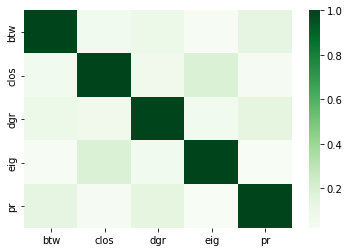

In [ ]:
def get_correlations2(values):
  names = ['btw', 'clos', 'dgr', 'eig', 'pr']
  result = {names[0]:values[0], names[1]:values[1], names[2]:values[2], names[3]:values[3], names[4]:values[4]}
  result = pd.DataFrame.from_dict(result)
  cormat = result.corr(method='spearman')
  return cormat

names = ['pAbs$_Btw', 'pAbs_Clos', 'pAbs_Dgr', 'pAbs_Eig', 'pAbs_Pr']
rankings = []

df_metrics['word_ids'] = df_metrics['pAbstract'].apply(get_words_ids)

rank_1 = get_rankings(df_metrics, names[0])
rank_2 = get_rankings(df_metrics, names[1])
rank_3 = get_rankings(df_metrics, names[2])
rank_4 = get_rankings(df_metrics, names[3])
rank_5 = get_rankings(df_metrics, names[4])

rankings = np.array([rank_1, rank_2, rank_3, rank_4, rank_5], dtype=object)
print(rankings.shape)

dfs = []
for index in range(rankings.shape[1]):
  abstracts = rankings[:,index] 
  correlations = get_correlations2(abstracts)
  dfs.append(correlations) 

df_res = pd.concat(dfs)
df_means = df_res.groupby(level=0).mean()
print(df_means)  
sns.heatmap(df_means, cmap='Greens');